In [2]:
import folium

In [15]:
center = [37.5642135, 127.0016985] # 서울 지도 중심
tiles = ['cartodbpositron', 'Stamen Toner', 'OpenStreetMap']
icon = ['star','flag']

In [11]:
seoul_map = folium.Map(location = [center[0], center[1]],
                       zoom_start = 12,
                       tiles = tiles[2]
)

seoul_map

In [13]:
lat, lon = 37.5012647456244, 127.03958123605
# lon = 

In [17]:
# 마커 찍는 예시
folium.Marker(location = [lat, lon],
              popup = '멀티캠퍼스',
              tooltip = '멀티캠퍼스',
              icon = folium.Icon('red', icon = icon[0])).add_to(seoul_map)

seoul_map

## 네이버 지도 따오기
### https://api.ncloud-docs.com/docs/ai-naver-mapsstaticmap-raster 

In [23]:
from PIL import Image
import requests
import io

In [24]:
# NCP 콘솔에서 복사한 클라이언트ID와 클라이언트Secret 값
client_id = ""
client_secret = ""

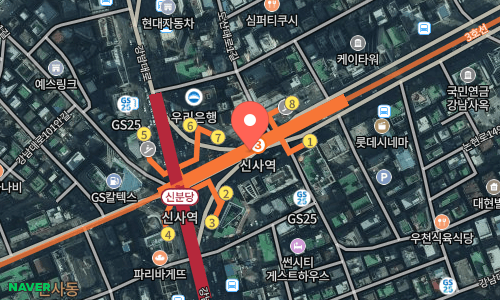

In [25]:
# 좌표 (경도, 위도)
endpoint = "https://naveropenapi.apigw.ntruss.com/map-static/v2/raster"
headers = {
    "X-NCP-APIGW-API-KEY-ID": client_id,
    "X-NCP-APIGW-API-KEY": client_secret,
}
# 중심 좌표
lon, lat = "127.020326886309", "37.5164324582415"
_center = f"{lon},{lat}"
# 줌 레벨 - 0 ~ 20
_level = 16
# 가로 세로 크기 (픽셀)
_w, _h = 500, 300
# 지도 유형 - basic, traffic, satellite, satellite_base, terrain
_maptype = "satellite"
# 반환 이미지 형식 - jpg, jpeg, png8, png
_format = "png"
# 고해상도 디스펠레이 지원을 위한 옵션 - 1, 2
_scale = 1
# 마커
_markers = f"""type:d|size:mid|pos:{lon} {lat}|color:red"""
# 라벨 언어 설정 - ko, en, ja, zh
_lang = "ko"
# 대중교통 정보 노출 - Boolean
_public_transit = True
# 서비스에서 사용할 데이터 버전 파라미터 전달 CDN 캐시 무효화
_dataversion = ""

# URL
url = f"{endpoint}?center={_center}&level={_level}&w={_w}&h={_h}&maptype={_maptype}&format={_format}&scale={_scale}&markers={_markers}&lang={_lang}&public_transit={_public_transit}&dataversion={_dataversion}"
res = requests.get(url, headers=headers)

image_data = io.BytesIO(res.content)
image = Image.open(image_data)
image

### 구글 지도 api 따오기
https://developers.google.com/maps/gmp-get-started?hl=ko

In [27]:
import googlemaps

In [28]:
gmap_keys = ""

In [29]:
gmaps = googlemaps.Client(key=gmap_keys)

In [34]:
tmp = gmaps.geocode("서울멀티캠퍼스", language="ko")
	# 여기서 오류나면 보통 키값 설정할 때 "geocoding API"으로 키 제한을 안 한 것이다.

In [35]:
tmp

[{'address_components': [{'long_name': '508',
    'short_name': '508',
    'types': ['premise']},
   {'long_name': '언주로',
    'short_name': '언주로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '강남구',
    'short_name': '강남구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '06151', 'short_name': '06151', 'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 강남구 언주로 508',
  'geometry': {'location': {'lat': 37.5038623, 'lng': 127.0428012},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5052112802915,
     'lng': 127.0441501802915},
    'southwest': {'lat': 37.5025133197085, 'lng': 127.0414522197085}}},
  'partial_match': True,
  'place_id': 'ChIJc6CiVAakfDUR1KHHcZ5zP08',
  'plus_code':